In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("drive/MyDrive/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
len(df)

48895

##Task 1
###Use the built-in function dropna() in pandas to drop rows which contain invalid data (row that contains at least one null value)
###In addition, we consider rows to be invalid if the price or availability equal to 0.


In [5]:
df = df.dropna()
df = df[df["price"] > 0]
df = df[df["availability_365"] > 0]

##Task 2

###part a
####Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood

In [6]:
# select only neighborhoods with more than 5 listings
neighbourhood_count = df["neighbourhood"].value_counts()
target_neighbourhood = neighbourhood_count[neighbourhood_count > 5]
target_df = df[df["neighbourhood"].isin(target_neighbourhood.index)]

In [7]:
# prices_by_neighbourhood contains the mean prices of each neighborhood in descending order.
prices_by_neighbourhood = target_df.groupby("neighbourhood").mean()["price"].sort_values(ascending = False)
print(prices_by_neighbourhood)

neighbourhood
Tribeca              535.868421
Flatiron District    342.000000
NoHo                 339.909091
SoHo                 312.821782
Midtown              296.498567
                        ...    
Parkchester           55.625000
Tremont               55.571429
Soundview             53.818182
Bronxdale             51.166667
Hunts Point           45.266667
Name: price, Length: 170, dtype: float64


In [8]:
top_5_neighbourhood = prices_by_neighbourhood[:5] # top 5 neighborhoods with the highest mean prices.
bottom_5_neighbourhood = prices_by_neighbourhood[len(prices_by_neighbourhood)-5:] # bottom 5 neighborhoods with the lowest mean prices.

#### top 5 neighborhood based on price

In [9]:
print(top_5_neighbourhood)

neighbourhood
Tribeca              535.868421
Flatiron District    342.000000
NoHo                 339.909091
SoHo                 312.821782
Midtown              296.498567
Name: price, dtype: float64


#### bottom 5 neighborhood based on price

In [10]:
print(bottom_5_neighbourhood)

neighbourhood
Parkchester    55.625000
Tremont        55.571429
Soundview      53.818182
Bronxdale      51.166667
Hunts Point    45.266667
Name: price, dtype: float64


###part b
####According to the graph, there is a significant difference in price variation among various neighborhoods.

####- Manhattan has the highest average price at $195.94, which is significantly higher than the other boroughs.

####- The Bronx has the lowest average price at $80.75

In [11]:
df.groupby("neighbourhood_group").mean()[["price"]]

,price
neighbourhood_group,
Bronx,80.745358
Brooklyn,128.430020
Manhattan,195.935245
Queens,95.387452
Staten Island,88.975610


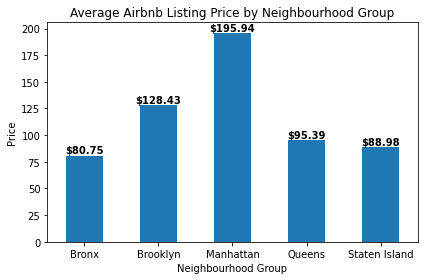

In [12]:
ax = df.groupby("neighbourhood_group").mean()["price"].plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Price")
plt.xlabel("Neighbourhood Group")
# plt.gcf().set_dpi(150)
plt.title("Average Airbnb Listing Price by Neighbourhood Group")

for i, v in enumerate(df.groupby("neighbourhood_group").mean()["price"]):
    ax.text(i, v, "${:.2f}".format(v), ha='center', va='bottom', fontweight='bold')


overall_avg_price = df['price'].mean()

plt.tight_layout()


plt.show()

## Task 3

####The most positive correlation is calculated_host_listings_count and availability_365. The most negative correlation is minimum_nights and number_of_reviews.

In [13]:
corr = df[["minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365", "price"]].corr(method="pearson")
corr

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
minimum_nights,1.000000,-0.097877,0.071037,0.089409,0.015594
number_of_reviews,-0.097877,1.000000,-0.094344,0.040741,-0.063265
calculated_host_listings_count,0.071037,-0.094344,1.000000,0.155553,0.057901
availability_365,0.089409,0.040741,0.155553,1.000000,0.067848
price,0.015594,-0.063265,0.057901,0.067848,1.000000


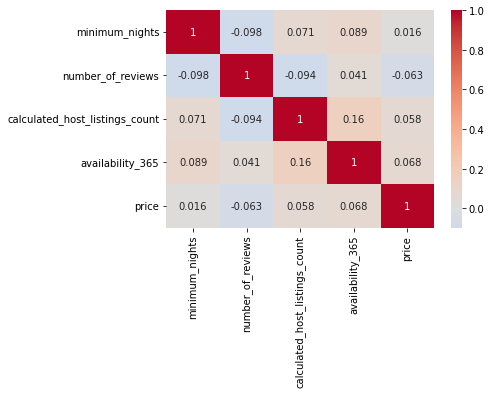

In [14]:
sns.heatmap(corr, cmap='coolwarm', annot=True, center=0)
plt.show()

##Task 4

### part a

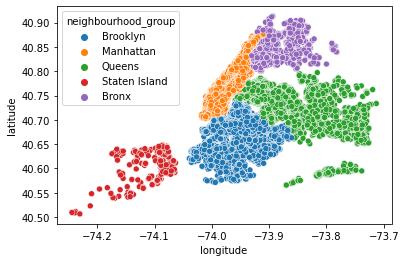

In [15]:
sns.scatterplot(data=df, x=df["longitude"], y=df["latitude"], hue=df["neighbourhood_group"])

plt.show()

### part b

####According to the plot, Manhattan neighborhood group is most expensive

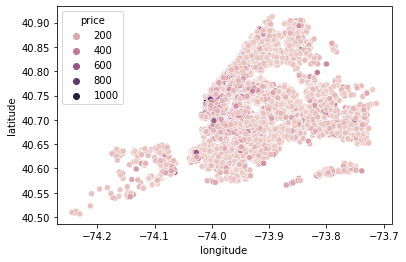

In [16]:
df_less_than_1000 = df[df["price"] <= 1000]

sns.scatterplot(data=df_less_than_1000, x=df_less_than_1000["longitude"], y=df_less_than_1000["latitude"], hue=df_less_than_1000["price"])

plt.show()

## Task 5

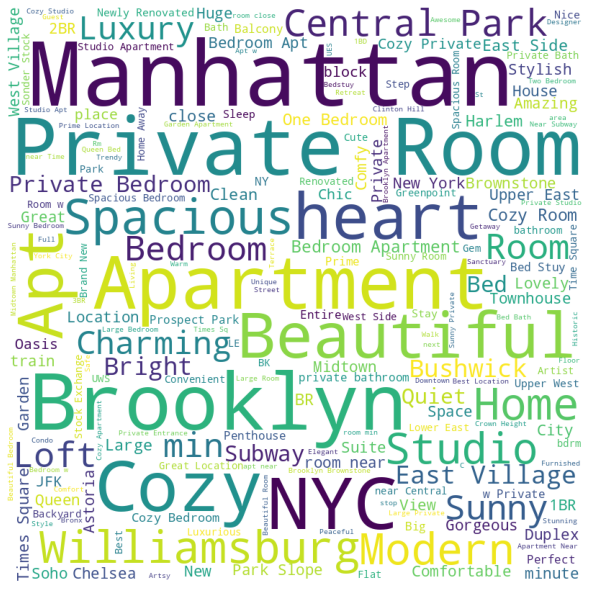

In [17]:
text = ' '.join([str(n) for n in df["name"]])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Task 6

####Eastchester has the busiest host

In [18]:
unique_hosts_df = df.drop_duplicates(subset=["host_id"])

host_listing_by_neighbourhood = unique_hosts_df.groupby("neighbourhood").mean().pivot_table(index='neighbourhood')["calculated_host_listings_count"].sort_values(ascending=False)
host_listing_by_neighbourhood

neighbourhood
Eastchester           13.000000
Financial District     6.220859
Far Rockaway           4.833333
Concord                3.400000
Little Neck            3.000000
                        ...    
Stuyvesant Town        1.000000
Richmondtown           1.000000
Todt Hill              1.000000
Mill Basin             1.000000
Mount Eden             1.000000
Name: calculated_host_listings_count, Length: 216, dtype: float64

In [19]:
df_top_5_listings = unique_hosts_df.sort_values("calculated_host_listings_count", ascending=False).head(5)
df_busiest_5_hosts = df[df["host_id"].isin(df_top_5_listings["host_id"])]

####Price - The top 5 busiest hosts charge a higher price compared to the average host, which could potentially make their properties less appealing to prospective renters and result in a longer duration on the market.

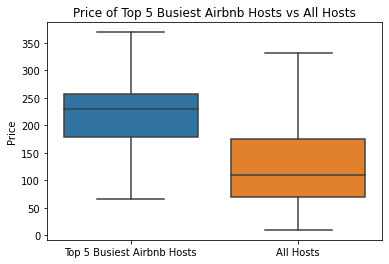

In [20]:
ax = sns.boxplot(data = [list(df_busiest_5_hosts["price"]), list(df["price"])], showfliers=False)
ax.set_ylabel("Price")
ax.set_title("Price of Top 5 Busiest Airbnb Hosts vs All Hosts")

ax.set_xticklabels(["Top 5 Busiest Airbnb Hosts", "All Hosts"])

plt.show()



####minimum_nights - The top 5 busiest hosts have a much higher minimum-night requirement compared to the average host, which may make their properties less desirable to potential renters who are not interested in renting for a long period of time. As a result, their listings may stay on the market for a longer duration.


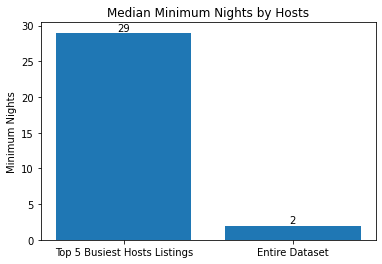

In [21]:
median_top_5_hosts = df_busiest_5_hosts["minimum_nights"].median()
median_entire_dataset = df["minimum_nights"].median()

fig, ax = plt.subplots()
bars = ax.bar(['Top 5 Busiest Hosts Listings', 'Entire Dataset'], [median_top_5_hosts, median_entire_dataset])

ax.set_ylabel('Minimum Nights')

ax.set_title('Median Minimum Nights by Hosts')

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{int(bar.get_height())}",
            ha='center', va='bottom', fontsize=10)

plt.show()

## Task 7

#### The pie chart depicts that the market is dominated by entire home/apartment listings, whereas shared rooms have the smallest market share. Therefore, if someone plans to become an Airbnb host in the future, it would be advisable for them to avoid listing a shared room.

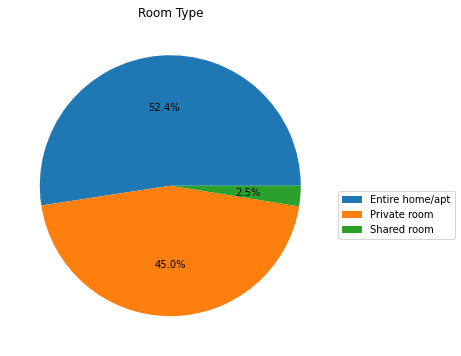

In [22]:
roomtype_series = df["room_type"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
ax = roomtype_series.plot(kind="pie",labels=None, autopct='%1.1f%%')
ax.set_title('Room Type', horizontalalignment='center')
ax.set_ylabel("")
ax.legend(labels=roomtype_series.index, bbox_to_anchor=(1, 0.5))
plt.show()

#### The pie chart provides a clear illustration of how Airbnb hosts are distributed across the various neighborhoods in New York City. The largest proportion of hosts is from Manhattan, accounting for 41.9% of the total, while Brooklyn comes in second with 41.6%.

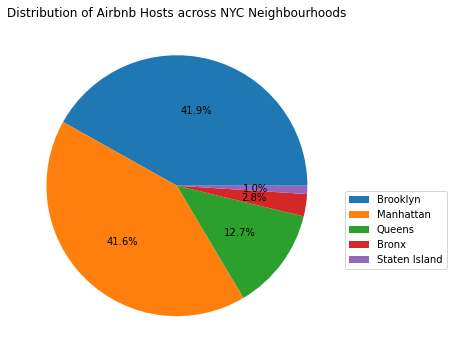

In [23]:
neighbourhood_group_series = unique_hosts_df["neighbourhood_group"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
ax = neighbourhood_group_series.plot(kind="pie",labels=None, autopct='%1.1f%%')
ax.set_title('Distribution of Airbnb Hosts across NYC Neighbourhoods', horizontalalignment='center')
ax.set_ylabel("")
ax.legend(labels=neighbourhood_group_series.index, bbox_to_anchor=(1, 0.5))
plt.show()